# K-Means Clustering

### The goal of Clustering is to identify groups of similar inputs and to find a representative value for each cluster.

## Import the Data

#### pandas provides excellent data reading and querying module,dataframe, which allows you to import structured data and perform SQL-like queries. We also use the mglearn package to help us visualize the data and models.

#### Here we imported some house price records from Trulia. For more about extracting data from Trulia, please check my previous tutorial.

#### We use the house ages and house prices as the input to identify groups of houses that have similar ages and prices.

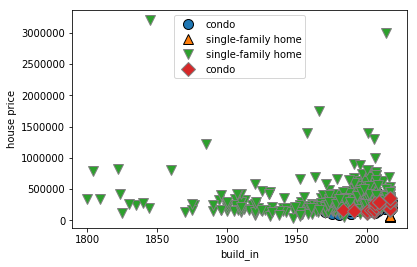

In [1]:
import sklearn
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
%matplotlib inline
import pandas
import numpy as np
import mglearn

df = pandas.read_excel('house_price_label.xlsx')
# combine multipl columns into a 2D array
# also convert the integer data to float data
X = np.column_stack((df.built_in.astype(float),df.price.astype(float))) 
y = df.house_type

# for classification, make sure a stratify splitting method is selected
mglearn.discrete_scatter(X[:,0],X[:,1],y) # use mglearn to visualize data

plt.legend(y,loc='best')
plt.xlabel('build_in')
plt.ylabel('house price')
plt.show()

## Clustering the Data

#### K-Means Clustering is one of the simplest and most commonly used clustering algorithms. The number of clusters k is chosen in advance, and the goal is to partition the inputs into sets in a way that minimizes the total sum of squared distances from each point to the mean of its assigned cluster.

#### Here we use KMeans to cluster houses based on house ages and house prices.

Text(0,0.5,'house price')

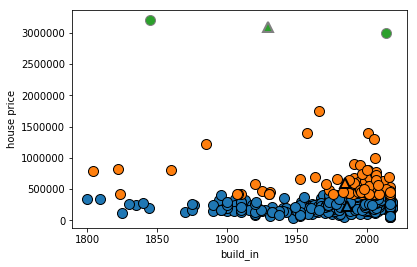

In [2]:
from sklearn.cluster import KMeans

# build the clustering model
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
    markers='^', markeredgewidth=2)
plt.xlabel('build_in')
plt.ylabel('house price')

#### If we choose large k values, the algorithm will cluster our data into more groups.

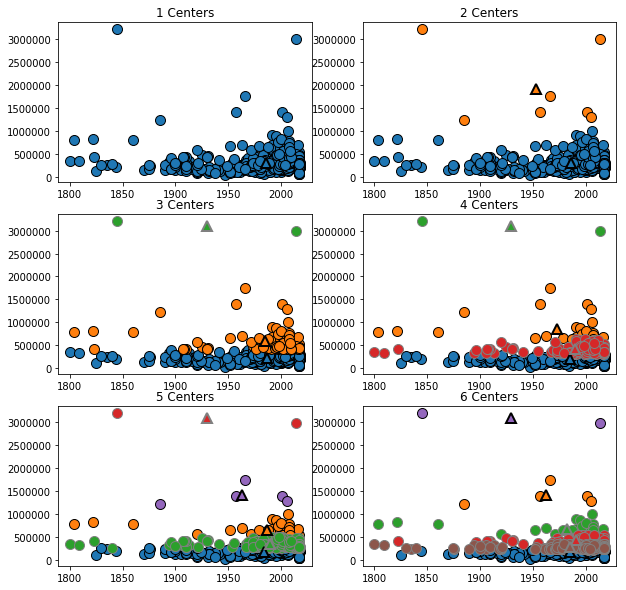

In [3]:
fig, axes = plt.subplots(3, 2, figsize=(10, 10))

for k, ax in enumerate(axes.ravel()):

    kmeans = KMeans(n_clusters=k+1)
    kmeans.fit(X)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_,  ax=ax, markers = 'o')
    mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],range(k+1), markers='^', markeredgewidth=2, ax=ax)
    ax.set_title("{} Centers".format(k+1))
plt.subplots_adjust(hspace=0.2)

## Visualize K Score

### k score is the opposite of the sum-of-squares distances within each cluster. We can plot the positive k scores against different k in the k-means clustering.

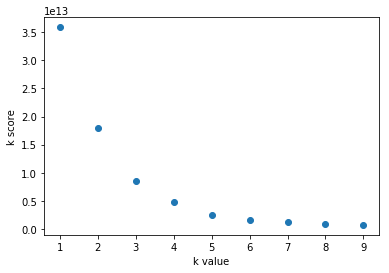

In [4]:
k_score = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    k_score.append(-kmeans.score(X) )
plt.scatter(range(1,10),k_score)
plt.xlabel("k value")
plt.ylabel("k score")
plt.show()